# CHAPTER4 모델 훈련

## 4-1 선형 회귀

### 4-1-1 정규방정식

In [ ]:
import numpy as np

X = 2 * np.random.rand(100 , 1)
y = 4 + 3 * X + np.random.randn(100 , 1)

In [ ]:
X_b = np.c_[np.ones((100 , 1)) , X]     # 모든 샘플에 x0 = 1을 추가합니다.
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [ ]:
theta_best

array([[4.1507356 ],
       [2.85245312]])

In [ ]:
X_new = np.array([[0] , [2]])
X_new_b = np.c_[np.ones((2, 1)) , X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.1507356 ],
       [9.85564185]])

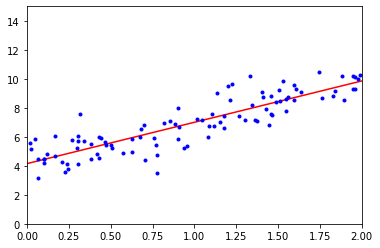

In [ ]:
import matplotlib.pyplot as plt

plt.plot(X_new , y_predict , "r-")
plt.plot(X , y , "b.")
plt.axis([0,2,0,15])
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
print(lin_reg.intercept_ , lin_reg.coef_)

[4.1507356] [[2.85245312]]


In [ ]:
print(lin_reg.predict(X_new))

[[4.1507356 ]
 [9.85564185]]


In [ ]:
theta_best_svd , residuals , rank, s = np.linalg.lstsq(X_b , y , rcond = 1e-6 )
theta_best_svd

array([[4.1507356 ],
       [2.85245312]])

### 4-1-2 계산 복잡도

## 4-2 경사 하강법

### 4-2-1 배치 경사 하강법

In [ ]:
eta = 0.1   # 학습률
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)    # 무작위 초기화

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [ ]:
theta

array([[4.1507356 ],
       [2.85245312]])

### 4-2-2 확률적 경사 하강법

In [ ]:
n_epochs = 50
t0, t1 = 5,  50     # 학습 스케쥴 하이퍼파라미터

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)    # 무작위 초기화

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index : random_index + 1]
        yi = y[random_index : random_index + 1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

In [ ]:
theta

array([[4.19279281],
       [2.8248668 ]])

In [ ]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter = 1000 , tol = 1e-3 , penalty = None , eta0 = 0.1)
sgd_reg.fit(X ,  y.ravel())     # ravel 은 한줄로 펴주는 듯

SGDRegressor(eta0=0.1, penalty=None)

In [ ]:
sgd_reg.intercept_ , sgd_reg.coef_

(array([4.15246974]), array([2.88110637]))

### 4-2-3 미니배치 경사 하강법

## 3-3 다항 회귀

In [ ]:
m = 100
X = 6 * np.random.rand(m ,1 ) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.rand(m , 1)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree = 2 , include_bias = False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-2.57980766])

In [ ]:
X_poly[0]

array([-2.57980766,  6.65540754])

In [ ]:
lin_reg  =LinearRegression()
lin_reg.fit(X_poly , y)
lin_reg.intercept_ , lin_reg.coef_

(array([2.51426356]), array([[0.9984886 , 0.48636528]]))

## 4-4 학습 곡선

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model , X , y):
    X_train , X_val , y_train , y_val = train_test_split(X ,y, test_size = 0.2)
    train_errors , val_errors = [] , []
    for m in range(1 , len(X_train)):
        model.fit(X_train[:m] , y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m] , y_train_predict))
        val_errors.append(mean_squared_error(y_val , y_val_predict))
    plt.plot(np.sqrt(train_errors) , 'r-+' , linewidth = 2 , label = '훈련세트')
    plt.plot(np.sqrt(val_errors) , 'b-' , linewidth = 3 , label = '검증 세트')

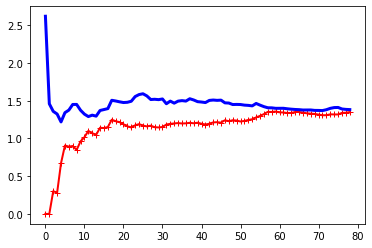

In [ ]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg , X , y)

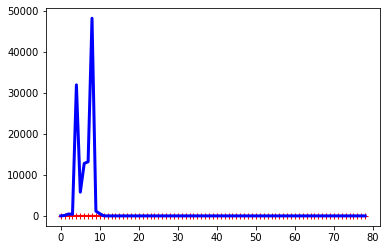

In [ ]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ("poly_features" , PolynomialFeatures(degree=10 , include_bias = False)),
    ("lin_reg" , LinearRegression()),
])

plot_learning_curves(polynomial_regression , X , y)

## 4-5 규제가 있는 선형 모델

### 4-5-1 릿지 회귀

In [ ]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1 , solver = 'cholesky')
ridge_reg.fit(X , y)
ridge_reg.predict([[1.5]])

array([[5.32046503]])

In [ ]:
sgd_reg = SGDRegressor(penalty = "l2")
sgd_reg.fit(X ,y.ravel())
sgd_reg.predict([[1.5]])

array([5.31411237])

### 4-5-2 라쏘 회귀

In [ ]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha = 0.1)
lasso_reg.fit(X , y)
lasso_reg.predict([[1.5]])

array([5.2770474])

### 4-5-3 엘라스틱 넷

In [ ]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1 , l1_ratio = 0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([5.28064869])

### 4-5-4 조기종료

In [ ]:
X_train = [[1]]
X_val = [[1]]
y_train = [1]
y_val =[1]

In [ ]:
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler

# 데이터 준비
poly_scaler = Pipeline([
    ("poly_features"  , PolynomialFeatures(degree = 90 , include_bias = False)),
     ("std_scaler" , StandardScaler())
])
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter = 1 , tol = -np.infty , warm_start = True , penalty = None , learning_rate = "constant" , eta0 = 0.0005)

minimum_val_error = float('inf')
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled , y_train)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val , y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

## 4-6 로지스틱 회귀

### 4-6-1 확률 추정

### 4-6-2 훈련과 비용 함수

### 4-6-3 결정 경계

In [1]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [2]:
X = iris["data"][: , 3:]

In [5]:
import numpy as np
y = (iris['target'] == 2).astype(np.int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


In [6]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X ,y)

LogisticRegression()

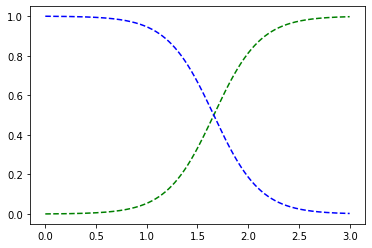

In [8]:
import matplotlib.pyplot as plt
X_new = np.linspace(0 , 3 , 1000).reshape(-1 , 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new , y_proba[:, 1] , 'g--' , label = 'Iris verginica')
plt.plot(X_new ,y_proba[: , 0] , 'b--' , label = 'Not Iris virginica')

In [9]:
log_reg.predict([[1.7] , [1.5]])

array([1, 0])

### 4-6-4 소프트맥스 홰ㅣ귀

In [12]:
X = iris["data"][: , (2,3)]
y = iris["target"]

softmax_reg = LogisticRegression(multi_class = 'multinomial' , solver = 'lbfgs' , C = 10)
softmax_reg.fit(X , y)

LogisticRegression(C=10, multi_class='multinomial')

In [13]:
softmax_reg.predict([[5,2]])

array([2])

In [14]:
softmax_reg.predict_proba([[5,2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])